In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() { if (code_show){ $('div.input').hide(); } else { $('div.input').show(); } code_show = !code_show } 
$( document ).ready(code_toggle);
</script>

Raw code hidden. To show code, click <a href="javascript:code_toggle()">here</a>. <b>To begin the notebook, click Kernel then click Restart & Run All. </b> ''')

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)


<center><h1>Combining and Editing Motifs to create 3D Basket Models</h1></center>
    
#### Authors: Howell Tan, Jenifer Pham & Laura Gutierrez Funderburk, Cedric Chauve
#### Contact: [Dr. Cedric Chauve](https://cchauve.github.io) and [Dr. Veselin Jungic](http://people.math.sfu.ca/~vjungic/)
#### This is joint collaboration with Tla'amin Nation members: Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters.
#### Acknowledgements:
We thank the Tla'amin Nation and members Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters for sharing their knowledge and wisdom on the craft of traditional basket weaving. Without their openness this project would have not taken place. We also acknowledge that this work was conducted in unceded territory of the Musqueam , Skxwú7mesh, Tsleil-Waututh, Kwikwetlem nations. We thank PIMS and Cybera, as well as the Government of Canada for providing financial support and infrastructure.
#### Last modified: October 26, 2018

In [2]:
%matplotlib inline
%run -i ./python_scripts/modules.py
%run -i ./python_scripts/colours.py
%run -i ./python_scripts/atomic_rectangle.py
%run -i ./python_scripts/atomic_triangle.py
%run -i ./python_scripts/atomic_chevron.py
%run -i ./python_scripts/operations.py
%run -i ./python_scripts/plotting.py
%run -i ./python_scripts/modify_patterns.py

In [3]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

In [4]:
def rerun_cell(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))

In [5]:
def generate_pattern_dir_listing():
    global pattern_files
    
    pattern_files = os.listdir('./patterns/')
    
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
        
    if 'dirList' in pattern_files:
        pattern_files.remove('dirList')
        
    pattern_files_string = ", ".join(pattern_files)
    
    file = open("./patterns/dirList", "w")    
    file.write(pattern_files_string)
    file.close()

## called by JS element
def save_edited_pattern(file_name2, new_pattern):
    global pattern_files
    
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    # Remove checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    # Write edited pattern into text file
    if (file_name2 != ''):
        file = open("./patterns/" + file_name2, "w")
        
        file.write(new_pattern)
        file.close()
        
    generate_pattern_dir_listing()

def save(pattern_string):
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")
    
    # Removed checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
        
    #Remove directory listing created for JS element
    if 'dirList' in pattern_files:
        pattern_files.remove('dirList')
    
    #Check if file name is taken
    if file_name3.value in pattern_files:
        display( Markdown("The file <b>" +  file_name3.value + '</b> already exists. If you still would like to save your pattern as <b>' + file_name3.value + '</b>, delete the file and save again.') )
    
    file_path = os.path.join()
    text_file = open("sample.txt", "w")
    n = text_file.write(txt)
    text_file.close   

def refresh_list(ev):
    global pattern_files
    
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    #remove directory listing created for JS elemen    
    if 'dirList' in pattern_files:
        pattern_files.remove('dirList')
    
    # Rerun cell to refresh list of files in pattern folder
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

def apply_alteration(ev):
    global create_button_clicked, join_button_clicked, edit_button_clicked
    create_button_clicked = True
    join_button_clicked = True
    edit_button_clicked = True
    
    # Run cell below
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))
    

In [6]:
global pattern_files, new_pattern, file_name, save_button

# Create folder name patterns in pattern folder does not exist
if not os.path.exists('patterns'):
    os.makedirs('patterns')
        
# List Pattern Text Files
pattern_files = os.listdir("./patterns/")

# Remove checkpoints from folder if exists
if '.ipynb_checkpoints' in pattern_files:
    pattern_files.remove('.ipynb_checkpoints')

#remove directory listing created for JS element
if 'dirList' in pattern_files:
    pattern_files.remove('dirList')

In [7]:
# Define layout and style of widgets
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='100%', justify_content = 'center')
style = {'description_width': 'initial'}

## Editing motifs & Creating your own motif
    
All motifs emerge from a blank canvas. If you click "Create Blank Canvas", you have full autonomy to create your own motif from scratch. Start by specifying the height and width of your canvas. That is, choose the number of respective rows and columns you would like your canvas to have. Note only positive integers values will be accepted. Decimal inputs will be rounded down to the nearest integer.

Once you have specified your dimensions, click the "Create Blank Canvas" button. To create your motif, choose a color and click on a block to change its color. To erase, choose the last color and click on the block you wish to erase.

However, if you want to edit an existing canvas, we can manually edit motifs by selecting a canvas you want from the "Select a file:" drop-down menu and clicking "Edit Canvas". To make changes to your motif, choose a color and click on a block in your motif display to change its color. To erase, choose the last color and click on the block you wish to erase.

In [1]:
from IPython.display import HTML
HTML(filename="./html_scripts/createCanvas.html")

## Creating 3D Basket Models

A *net* of a 3D shape is an arrangement of two dimensional shapes which can be folded along the edges to become the faces of the 3D shape.  Given a rectangular basket (without a lid cover), we see that the net of the basket consists of five shapes: one rectangle, which makes up the bottom of the basket, and four trapezoids, which make up the sides. Hence, we can add up to four motifs to generate a 3D model of a rectangular basket with motifs.

<center> <img src="./images/net-rect.png" alt="Rectangular Basket and Net" width = 50%>
    
Given a circular basket (without a lid cover), we see that the net of the basket consists of only two shapes. The bottom of the basket is circular in shape and the surface, making up the sides of the basket can be thought of as a single curved trapezoid. Hence, we only require one motif to generate a 3D model of a circular basket with motifs.

<center> <img src="./images/net-circ.png" alt="Circular Basket and Net" width = 50%>

To place your motifs onto 3D models, first choose a basket shape and then choose the motif you would like to see on each face. If you have saved your motif but do not see the file in the dropdown menu, try clicking on the Refresh Files button. 

In [9]:
def toggle_button_run_cell(change):
    # Run next 4 cells once toggle is changed to display appropriate widgets
    value = change['new']
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+5)'))

def refresh_list(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1, IPython.notebook.get_selected_index()+1)'))
    
def plot_basket(ev):
    global files_selected
    files_selected = True
    
    # Run next cell to plot basket
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))


In [10]:
global files_selected
files_selected = False

# Create Toggle Buttons for basket shape selection
basket_options = widgets.ToggleButtons(
    button_style = 'info',
    options=['Rectangular Basket', 'Circular Basket'],
    description='',
    disabled=False,
    layout = Layout(display='flex',
                    align_items='stretch',
                    justify_content = 'center'))

display(basket_options)
basket_options.observe(toggle_button_run_cell, 'value')

ToggleButtons(button_style='info', layout=Layout(align_items='stretch', display='flex', justify_content='cente…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
basket_chose = basket_options.value

# Display example of basket image
if (basket_chose == 'Rectangular Basket'):
    display(Markdown('<center><h2> Rectangular Basket </h2>'))
    display(Markdown('<center> <img src="./images/rect-basket.png" alt="Rectangular Basket">'))

elif (basket_chose == 'Circular Basket'):
    display(Markdown('<center><h2> Circular Basket </h2>'))
    display(Markdown('<center> <img src="./images/circ-basket.png" alt="Circular Basket">'))


<center><h2> Rectangular Basket </h2>

<center> <img src="./images/rect-basket.png" alt="Rectangular Basket">

In [37]:
# List Pattern Text Files
pattern_files = os.listdir("./patterns/")

if '.ipynb_checkpoints' in pattern_files:
    pattern_files.remove('.ipynb_checkpoints')
    
#remove directory listing created for JS element
if 'dirList' in pattern_files:
    pattern_files.remove('dirList')
    
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='100%', justify_content = 'center')
style = {'description_width': 'initial'}

In [38]:
# Create Refresh Button
refresh_button = widgets.Button( button_style= 'info', description="Refresh Files")
refresh_button.on_click(refresh_list)

# Create Plot Button
plot_button = widgets.Button( button_style= 'info', description="Plot Basket")
plot_button.on_click(plot_basket)

# Create Dropdown Menus for Faces of the Rectangular Basket
front_pattern = widgets.Dropdown(options = pattern_files, description ='Front Motif:', style = style, disabled=False,)
back_pattern = widgets.Dropdown(options = pattern_files, description ='Back Motif:', style = style, disabled=False,)
left_pattern = widgets.Dropdown(options = pattern_files, description ='Left Side Motif:', style = style, disabled=False,)
right_pattern = widgets.Dropdown(options = pattern_files, description ='Right Side Motif:', style = style, disabled=False,)

box1 = VBox([front_pattern, back_pattern], layout = Layout(display= 'flex', flex_flow= 'column', align_items= 'center', width='50%', justify_content = 'center'))
box2 = VBox([left_pattern, right_pattern], layout = Layout(display= 'flex', flex_flow= 'column', align_items= 'center', width='50%', justify_content = 'center'))

# Create Dropdown Menu for Face of the Circular Basket
circ_pattern = widgets.Dropdown(options = pattern_files, description ='Motif:', style = style, disabled=False,)

if (basket_chose == 'Rectangular Basket'):
    
    display(Box(children = [box1, box2], layout = box_layout))
    display(Box(children = [plot_button, refresh_button], layout = box_layout))
    
elif (basket_chose == 'Circular Basket'):
    
    display(Box(children = [circ_pattern, refresh_button], layout = box_layout))
    display(Box(children = [plot_button], layout = box_layout))


Box(children=(VBox(children=(Dropdown(description='Front Motif:', options=('Cross', 'Expanded Triangle', 'Squa…

Box(children=(Button(button_style='info', description='Plot Basket', style=ButtonStyle()), Button(button_style…

<IPython.core.display.Javascript object>

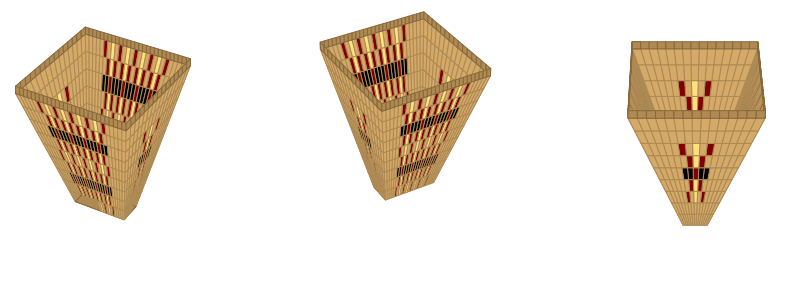

In [40]:
# Check if files have been selected 
# Assign pattern to appropriate face(s) and plot basket
if files_selected == True:  
    print("Plotting basket...please wait a few seconds to create 3D model")
    if (basket_chose == 'Rectangular Basket'):

        front = open('./patterns/'+ front_pattern.value, 'r') 
        front = front.read()

        back = open('./patterns/'+ back_pattern.value, 'r') 
        back = back.read()

        left = open('./patterns/'+ left_pattern.value, 'r') 
        left = left.read()

        right = open('./patterns/'+ right_pattern.value, 'r') 
        right = right.read()

        plot_rect_basket(front, back, left, right, ori_p)

    elif (basket_chose == 'Circular Basket'):
        pattern = open('./patterns/'+ circ_pattern.value, 'r')
        pattern = pattern.read()
        plot_circ_basket(pattern, ori_p)
    

    files_selected = False

In [15]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
            
                jupyter.actions.call('jupyter-notebook:save-notebook');
                
            });
        }
    );
</script>

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)